In [1]:
!pip install openclip-torch
!pip install ftfy regex tqdm
# (zaten var ama versiyona göre eklenebilir)
!pip install torch torchvision

ERROR: Could not find a version that satisfies the requirement openclip-torch (from versions: none)
ERROR: No matching distribution found for openclip-torch
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 100.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 64.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21

In [2]:
!pip install ftfy regex tqdm
!pip install git+https://github.com/mlfoundations/open_clip.git
!pip install timm
!pip install torch torchvision torchaudio

  Cloning https://github.com/mlfoundations/open_clip.git to /tmp/pip-req-build-4cv_m_lq
  Running command git clone --filter=blob:none --quiet https://github.com/mlfoundations/open_clip.git /tmp/pip-req-build-4cv_m_lq
  Resolved https://github.com/mlfoundations/open_clip.git to commit 223afc46ac549f9e86e5cde17a1e476631d1d58f
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for open_clip_torch: filename=open_clip_torch-3.0.0-py3-none-any.whl size=1539626 sha256=183af4e67e4abfb0b809367fe730956534e5e3deae985511422f13287dc18821
  Stored in directory: /tmp/pip-ephem-wheel-cache-jhcrxrm2/wheels/d8/9b/13/a8a2e5c224e89773936b77a6cabeef655305344e23f7b02065
Successfully built open_clip_torch


In [3]:
from google.colab import files
uploaded = files.upload()


Saving datasetv2.zip to datasetv2.zip


In [4]:
import zipfile
import os

zip_path = "datasetv2.zip"  # Yüklediğin dosyanın ismi bu olmalı
extract_dir = "/content/datasetv2"

# Klasörü oluştur
os.makedirs(extract_dir, exist_ok=True)

# Zip'i çıkar
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Veri seti çıkarıldı:", extract_dir)


Veri seti çıkarıldı: /content/datasetv2


In [5]:
import os

for root, dirs, files in os.walk(extract_dir):
    print("Klasör:", root)
    print("Alt klasörler:", dirs)
    print("Dosyalar:", files[:5])  # Çok uzunsa sadece ilk 5 dosyayı göster
    break


Klasör: /content/datasetv2
Alt klasörler: ['__MACOSX', 'datasetv2']
Dosyalar: []


In [6]:
real_dataset_path = "/content/datasetv2/datasetv2"

In [7]:
import os

real_dataset_path = "/content/datasetv2/datasetv2"
class_folders = os.listdir(real_dataset_path)
print("Sınıf klasörleri:", class_folders)

Sınıf klasörleri: ['skoda-fabia', 'ford-fiesta', 'volkswagen-passat', 'opel-astra', 'skoda-octavia', 'bmw-3-series', 'opel-meriva', 'hyundai-i30', 'smart-forfour', 'alfa-romeo-giulia', 'skoda-superb', 'volkswagen-golf', 'audi-a4', 'peugeot-208', 'citroen-c4-grand-picasso', 'seat-leon', 'toyota-c-hr', 'ford-fusion', 'dacia-spring', 'opel-corsa', 'bmw-x3', 'fiat-bravo', 'ford-mondeo', 'honda-civic', 'peugeot-3008', 'mini-countryman', 'renault-captur', 'dacia-logan', 'volkswagen-polo', 'toyota-yaris', 'suzuki-sx4-s-cross', 'tesla-s', 'mazda-2', 'toyota-corolla', 'kia-sportage', 'audi-a6', 'seat-ibiza', 'ford-transit', 'suzuki-vitara', 'citroen-c3', 'mitsubishi-l200', '.DS_Store', 'maserati-levante', 'ford-focus', 'smart-fortwo']


In [8]:
!pip install open_clip_torch

import open_clip
import torch
from PIL import Image
from torchvision import transforms
import os
from tqdm import tqdm

In [9]:
device = "cuda" if torch.cuda.is_available() else "cpu"

model, _, preprocess = open_clip.create_model_and_transforms(
    'ViT-B-32', pretrained='laion2b_s34b_b79k'
)
tokenizer = open_clip.get_tokenizer('ViT-B-32')
model = model.to(device)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


open_clip_model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

In [10]:
import os

# ✅ Gerçek klasör yolunu kullan
dataset_path = "/content/datasetv2/datasetv2"

# Klasörleri oku ve .DS_Store gibi gereksizleri ayıkla
class_folders = sorted([
    name for name in os.listdir(dataset_path)
    if os.path.isdir(os.path.join(dataset_path, name)) and not name.startswith(".")
])

# Klasör isimlerini kontrol et
print("Klasör sayısı:", len(class_folders))
print("Klasörler:", class_folders[:5])  # İlk 5 tanesini gösterelim


Klasör sayısı: 44
Klasörler: ['alfa-romeo-giulia', 'audi-a4', 'audi-a6', 'bmw-3-series', 'bmw-x3']


In [11]:
import glob

image_paths = []
image_labels = []

# Her klasörü sırayla gez
for class_name in class_folders:
    class_dir = os.path.join(dataset_path, class_name)

    # jpg ve png uzantılı tüm görselleri bul
    images = glob.glob(os.path.join(class_dir, "*.jpg")) + glob.glob(os.path.join(class_dir, "*.png"))

    # Her görselin yolunu ve etiketini ekle
    for img_path in images:
        image_paths.append(img_path)
        image_labels.append(class_name)

print(f"Toplam görsel sayısı: {len(image_paths)}")
print("Örnek:", image_paths[0], "->", image_labels[0])


Toplam görsel sayısı: 2684
Örnek: /content/datasetv2/datasetv2/alfa-romeo-giulia/0234.jpg -> alfa-romeo-giulia


In [12]:
import torch
import open_clip
from PIL import Image
from torchvision import transforms
from tqdm import tqdm

# OpenCLIP modelini yükle (ViT-B-32 versiyonu ve laion2b ön eğitimi)
model, _, preprocess = open_clip.create_model_and_transforms('ViT-B-32', pretrained='laion2b_s34b_b79k')
tokenizer = open_clip.get_tokenizer('ViT-B-32')

device = "cuda" if torch.cuda.is_available() else "cpu"
model = model.to(device).eval()

# Görsel özelliklerini çıkar
image_features = []

for path in tqdm(image_paths, desc="Görsel vektörleri çıkarılıyor"):
    try:
        image = Image.open(path).convert("RGB")
        image_input = preprocess(image).unsqueeze(0).to(device)

        with torch.no_grad():
            image_feature = model.encode_image(image_input)
            image_feature /= image_feature.norm(dim=-1, keepdim=True)

        image_features.append(image_feature.cpu().squeeze())
    except Exception as e:
        print(f"Hata oluştu: {path} - {e}")


Görsel vektörleri çıkarılıyor: 100%|██████████| 2684/2684 [12:31<00:00,  3.57it/s]


In [13]:
# Kök klasör (senin dataset yolun)
dataset_path = "/content/datasetv2/datasetv2"

# Klasör isimlerini oku (class name olarak kullanılıyor)
class_folders = sorted([
    name for name in os.listdir(dataset_path)
    if os.path.isdir(os.path.join(dataset_path, name)) and not name.startswith(".")
])

# Görsel yollarını ve etiketlerini topla
image_paths = []
labels = []

for class_name in class_folders:
    class_path = os.path.join(dataset_path, class_name)
    for fname in os.listdir(class_path):
        if fname.lower().endswith((".jpg", ".jpeg", ".png")):
            image_paths.append(os.path.join(class_path, fname))
            labels.append(class_name)

print(f"Toplam görsel: {len(image_paths)}, Etiket sayısı: {len(set(labels))}")


Toplam görsel: 2684, Etiket sayısı: 44


In [14]:
honda_indices = [i for i, label in enumerate(labels) if label == "honda-civic"]

In [15]:
!pip install open_clip_torch

In [16]:
import os
from PIL import Image
from tqdm import tqdm
import torch
from open_clip import create_model_and_transforms, tokenize # Corrected import

# Dataset folder path
dataset_path = "/content/datasetv2/datasetv2"

# CLIP modelini yükle
model, _, preprocess = create_model_and_transforms('ViT-B-32', pretrained='openai')
model = model.eval().cuda() if torch.cuda.is_available() else model.eval()

# Görsel vektörleri ve etiket listeleri
features = []
labels = []
image_paths = []

# Her klasörü gez
for class_name in sorted(os.listdir(dataset_path)):
    class_dir = os.path.join(dataset_path, class_name)
    if not os.path.isdir(class_dir): continue

    for file_name in tqdm(os.listdir(class_dir), desc=f"{class_name} klasörü"):
        file_path = os.path.join(class_dir, file_name)
        try:
            image = Image.open(file_path).convert("RGB")
            image_input = preprocess(image).unsqueeze(0)
            with torch.no_grad():
                image_features = model.encode_image(image_input.cuda() if torch.cuda.is_available() else image_input)
            features.append(image_features.squeeze().cpu().numpy())
            labels.append(class_name)
            image_paths.append(file_path)
        except Exception as e:
            print(f"Hata: {file_path} -> {e}")

# numpy dizisine çevir
import numpy as np
features = np.array(features)

open_clip_model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/open_clip/factory.py:450: UserWarning: QuickGELU mismatch between final model config (quick_gelu=False) and pretrained tag 'openai' (quick_gelu=True).
  warnings.warn(
alfa-romeo-giulia klasörü:  97%|█████████▋| 60/62 [00:15<00:00,  4.44it/s]

Hata: /content/datasetv2/datasetv2/alfa-romeo-giulia/.DS_Store -> cannot identify image file '/content/datasetv2/datasetv2/alfa-romeo-giulia/.DS_Store'


audi-a4 klasörü:  95%|█████████▌| 59/62 [00:15<00:01,  2.93it/s]

Hata: /content/datasetv2/datasetv2/audi-a4/.DS_Store -> cannot identify image file '/content/datasetv2/datasetv2/audi-a4/.DS_Store'


audi-a6 klasörü:  95%|█████████▌| 59/62 [00:15<00:00,  3.98it/s]

Hata: /content/datasetv2/datasetv2/audi-a6/.DS_Store -> cannot identify image file '/content/datasetv2/datasetv2/audi-a6/.DS_Store'


bmw-3-series klasörü:  95%|█████████▌| 59/62 [00:15<00:00,  4.05it/s]

Hata: /content/datasetv2/datasetv2/bmw-3-series/.DS_Store -> cannot identify image file '/content/datasetv2/datasetv2/bmw-3-series/.DS_Store'


bmw-x3 klasörü:  95%|█████████▌| 59/62 [00:15<00:00,  4.10it/s]

Hata: /content/datasetv2/datasetv2/bmw-x3/.DS_Store -> cannot identify image file '/content/datasetv2/datasetv2/bmw-x3/.DS_Store'


citroen-c3 klasörü:  95%|█████████▌| 59/62 [00:15<00:00,  3.52it/s]

Hata: /content/datasetv2/datasetv2/citroen-c3/.DS_Store -> cannot identify image file '/content/datasetv2/datasetv2/citroen-c3/.DS_Store'


citroen-c4-grand-picasso klasörü:  95%|█████████▌| 59/62 [00:16<00:00,  3.66it/s]

Hata: /content/datasetv2/datasetv2/citroen-c4-grand-picasso/.DS_Store -> cannot identify image file '/content/datasetv2/datasetv2/citroen-c4-grand-picasso/.DS_Store'


dacia-logan klasörü:  95%|█████████▌| 59/62 [00:22<00:00,  4.19it/s]

Hata: /content/datasetv2/datasetv2/dacia-logan/.DS_Store -> cannot identify image file '/content/datasetv2/datasetv2/dacia-logan/.DS_Store'


dacia-spring klasörü:  95%|█████████▌| 59/62 [00:15<00:00,  4.14it/s]

Hata: /content/datasetv2/datasetv2/dacia-spring/.DS_Store -> cannot identify image file '/content/datasetv2/datasetv2/dacia-spring/.DS_Store'


fiat-bravo klasörü:  95%|█████████▌| 59/62 [00:16<00:00,  3.23it/s]

Hata: /content/datasetv2/datasetv2/fiat-bravo/.DS_Store -> cannot identify image file '/content/datasetv2/datasetv2/fiat-bravo/.DS_Store'


ford-fiesta klasörü:  95%|█████████▌| 59/62 [00:15<00:00,  4.15it/s]

Hata: /content/datasetv2/datasetv2/ford-fiesta/.DS_Store -> cannot identify image file '/content/datasetv2/datasetv2/ford-fiesta/.DS_Store'


ford-focus klasörü:  95%|█████████▌| 59/62 [00:15<00:00,  4.14it/s]

Hata: /content/datasetv2/datasetv2/ford-focus/.DS_Store -> cannot identify image file '/content/datasetv2/datasetv2/ford-focus/.DS_Store'


ford-fusion klasörü:  95%|█████████▌| 59/62 [00:15<00:00,  4.15it/s]

Hata: /content/datasetv2/datasetv2/ford-fusion/.DS_Store -> cannot identify image file '/content/datasetv2/datasetv2/ford-fusion/.DS_Store'


ford-mondeo klasörü:  95%|█████████▌| 59/62 [00:16<00:01,  2.71it/s]

Hata: /content/datasetv2/datasetv2/ford-mondeo/.DS_Store -> cannot identify image file '/content/datasetv2/datasetv2/ford-mondeo/.DS_Store'


ford-transit klasörü:  95%|█████████▌| 59/62 [00:15<00:00,  4.07it/s]

Hata: /content/datasetv2/datasetv2/ford-transit/.DS_Store -> cannot identify image file '/content/datasetv2/datasetv2/ford-transit/.DS_Store'


honda-civic klasörü:  95%|█████████▌| 59/62 [00:15<00:00,  4.12it/s]

Hata: /content/datasetv2/datasetv2/honda-civic/.DS_Store -> cannot identify image file '/content/datasetv2/datasetv2/honda-civic/.DS_Store'


hyundai-i30 klasörü:  95%|█████████▌| 59/62 [00:15<00:00,  4.19it/s]

Hata: /content/datasetv2/datasetv2/hyundai-i30/.DS_Store -> cannot identify image file '/content/datasetv2/datasetv2/hyundai-i30/.DS_Store'


kia-sportage klasörü:  95%|█████████▌| 59/62 [00:15<00:01,  2.92it/s]

Hata: /content/datasetv2/datasetv2/kia-sportage/.DS_Store -> cannot identify image file '/content/datasetv2/datasetv2/kia-sportage/.DS_Store'


maserati-levante klasörü:  95%|█████████▌| 59/62 [00:15<00:00,  3.95it/s]

Hata: /content/datasetv2/datasetv2/maserati-levante/.DS_Store -> cannot identify image file '/content/datasetv2/datasetv2/maserati-levante/.DS_Store'


mazda-2 klasörü:  95%|█████████▌| 59/62 [00:15<00:00,  4.17it/s]

Hata: /content/datasetv2/datasetv2/mazda-2/.DS_Store -> cannot identify image file '/content/datasetv2/datasetv2/mazda-2/.DS_Store'


mini-countryman klasörü:  95%|█████████▌| 59/62 [00:15<00:00,  4.02it/s]

Hata: /content/datasetv2/datasetv2/mini-countryman/.DS_Store -> cannot identify image file '/content/datasetv2/datasetv2/mini-countryman/.DS_Store'


mitsubishi-l200 klasörü:  95%|█████████▌| 59/62 [00:15<00:00,  3.30it/s]

Hata: /content/datasetv2/datasetv2/mitsubishi-l200/.DS_Store -> cannot identify image file '/content/datasetv2/datasetv2/mitsubishi-l200/.DS_Store'


opel-astra klasörü:  95%|█████████▌| 59/62 [00:16<00:00,  3.85it/s]

Hata: /content/datasetv2/datasetv2/opel-astra/.DS_Store -> cannot identify image file '/content/datasetv2/datasetv2/opel-astra/.DS_Store'


opel-corsa klasörü:  95%|█████████▌| 59/62 [00:15<00:00,  4.16it/s]

Hata: /content/datasetv2/datasetv2/opel-corsa/.DS_Store -> cannot identify image file '/content/datasetv2/datasetv2/opel-corsa/.DS_Store'


opel-meriva klasörü:  95%|█████████▌| 59/62 [00:15<00:00,  4.16it/s]

Hata: /content/datasetv2/datasetv2/opel-meriva/.DS_Store -> cannot identify image file '/content/datasetv2/datasetv2/opel-meriva/.DS_Store'


peugeot-208 klasörü:  95%|█████████▌| 59/62 [00:15<00:00,  4.04it/s]

Hata: /content/datasetv2/datasetv2/peugeot-208/.DS_Store -> cannot identify image file '/content/datasetv2/datasetv2/peugeot-208/.DS_Store'


peugeot-3008 klasörü:  95%|█████████▌| 59/62 [00:16<00:00,  3.26it/s]

Hata: /content/datasetv2/datasetv2/peugeot-3008/.DS_Store -> cannot identify image file '/content/datasetv2/datasetv2/peugeot-3008/.DS_Store'


renault-captur klasörü:  95%|█████████▌| 59/62 [00:15<00:00,  3.94it/s]

Hata: /content/datasetv2/datasetv2/renault-captur/.DS_Store -> cannot identify image file '/content/datasetv2/datasetv2/renault-captur/.DS_Store'


seat-ibiza klasörü:  95%|█████████▌| 59/62 [00:15<00:00,  4.12it/s]

Hata: /content/datasetv2/datasetv2/seat-ibiza/.DS_Store -> cannot identify image file '/content/datasetv2/datasetv2/seat-ibiza/.DS_Store'


seat-leon klasörü:  95%|█████████▌| 59/62 [00:15<00:00,  4.10it/s]

Hata: /content/datasetv2/datasetv2/seat-leon/.DS_Store -> cannot identify image file '/content/datasetv2/datasetv2/seat-leon/.DS_Store'


skoda-fabia klasörü:  95%|█████████▌| 59/62 [00:16<00:01,  2.65it/s]

Hata: /content/datasetv2/datasetv2/skoda-fabia/.DS_Store -> cannot identify image file '/content/datasetv2/datasetv2/skoda-fabia/.DS_Store'


skoda-octavia klasörü:  95%|█████████▌| 59/62 [00:15<00:00,  4.12it/s]

Hata: /content/datasetv2/datasetv2/skoda-octavia/.DS_Store -> cannot identify image file '/content/datasetv2/datasetv2/skoda-octavia/.DS_Store'


skoda-superb klasörü:  95%|█████████▌| 59/62 [00:15<00:00,  4.15it/s]

Hata: /content/datasetv2/datasetv2/skoda-superb/.DS_Store -> cannot identify image file '/content/datasetv2/datasetv2/skoda-superb/.DS_Store'


smart-forfour klasörü:  95%|█████████▌| 59/62 [00:15<00:00,  4.05it/s]

Hata: /content/datasetv2/datasetv2/smart-forfour/.DS_Store -> cannot identify image file '/content/datasetv2/datasetv2/smart-forfour/.DS_Store'


smart-fortwo klasörü:  95%|█████████▌| 59/62 [00:15<00:00,  3.02it/s]

Hata: /content/datasetv2/datasetv2/smart-fortwo/.DS_Store -> cannot identify image file '/content/datasetv2/datasetv2/smart-fortwo/.DS_Store'


suzuki-sx4-s-cross klasörü:  95%|█████████▌| 59/62 [00:15<00:00,  3.97it/s]

Hata: /content/datasetv2/datasetv2/suzuki-sx4-s-cross/.DS_Store -> cannot identify image file '/content/datasetv2/datasetv2/suzuki-sx4-s-cross/.DS_Store'


suzuki-vitara klasörü:  95%|█████████▌| 59/62 [00:15<00:00,  4.07it/s]

Hata: /content/datasetv2/datasetv2/suzuki-vitara/.DS_Store -> cannot identify image file '/content/datasetv2/datasetv2/suzuki-vitara/.DS_Store'


tesla-s klasörü:  95%|█████████▌| 59/62 [00:15<00:00,  4.20it/s]

Hata: /content/datasetv2/datasetv2/tesla-s/.DS_Store -> cannot identify image file '/content/datasetv2/datasetv2/tesla-s/.DS_Store'


toyota-c-hr klasörü:  95%|█████████▌| 59/62 [00:15<00:00,  4.02it/s]

Hata: /content/datasetv2/datasetv2/toyota-c-hr/.DS_Store -> cannot identify image file '/content/datasetv2/datasetv2/toyota-c-hr/.DS_Store'


toyota-corolla klasörü:  95%|█████████▌| 59/62 [00:16<00:00,  3.59it/s]

Hata: /content/datasetv2/datasetv2/toyota-corolla/.DS_Store -> cannot identify image file '/content/datasetv2/datasetv2/toyota-corolla/.DS_Store'


toyota-yaris klasörü:  95%|█████████▌| 59/62 [00:15<00:00,  4.19it/s]

Hata: /content/datasetv2/datasetv2/toyota-yaris/.DS_Store -> cannot identify image file '/content/datasetv2/datasetv2/toyota-yaris/.DS_Store'


volkswagen-golf klasörü:  95%|█████████▌| 59/62 [00:15<00:00,  4.16it/s]

Hata: /content/datasetv2/datasetv2/volkswagen-golf/.DS_Store -> cannot identify image file '/content/datasetv2/datasetv2/volkswagen-golf/.DS_Store'


volkswagen-passat klasörü:  95%|█████████▌| 59/62 [00:15<00:00,  4.05it/s]

Hata: /content/datasetv2/datasetv2/volkswagen-passat/.DS_Store -> cannot identify image file '/content/datasetv2/datasetv2/volkswagen-passat/.DS_Store'


volkswagen-polo klasörü:  95%|█████████▌| 59/62 [00:17<00:00,  3.26it/s]

Hata: /content/datasetv2/datasetv2/volkswagen-polo/.DS_Store -> cannot identify image file '/content/datasetv2/datasetv2/volkswagen-polo/.DS_Store'


volkswagen-polo klasörü: 100%|██████████| 62/62 [00:17<00:00,  3.53it/s]


In [17]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Honda Civic index'lerini bul
honda_indices = [i for i, label in enumerate(labels) if label == "honda-civic"]

# Honda Civic'e ait vektörler
honda_features = features[honda_indices]

# Tüm görsellerle benzerlikleri hesapla
similarity_scores = cosine_similarity(honda_features, features)

# Her Honda görseli için en benzer görsellerin index'ini alalım
top_k = 5  # En benzer 5 görseli göster
for i, sim_row in enumerate(similarity_scores):
    print(f"\n🔍 Honda Civic Görseli {i+1}: {image_paths[honda_indices[i]]}")

    top_indices = np.argsort(sim_row)[-top_k-1:-1][::-1]  # kendisi hariç en benzer 5
    for rank, idx in enumerate(top_indices, 1):
        print(f"  {rank}. {labels[idx]} -> {image_paths[idx]}")



🔍 Honda Civic Görseli 1: /content/datasetv2/datasetv2/honda-civic/0234.jpg
  1. honda-civic -> /content/datasetv2/datasetv2/honda-civic/0228.jpg
  2. honda-civic -> /content/datasetv2/datasetv2/honda-civic/0240.jpg
  3. honda-civic -> /content/datasetv2/datasetv2/honda-civic/0222.jpg
  4. honda-civic -> /content/datasetv2/datasetv2/honda-civic/0210.jpg
  5. honda-civic -> /content/datasetv2/datasetv2/honda-civic/0216.jpg

🔍 Honda Civic Görseli 2: /content/datasetv2/datasetv2/honda-civic/0252.jpg
  1. honda-civic -> /content/datasetv2/datasetv2/honda-civic/0246.jpg
  2. honda-civic -> /content/datasetv2/datasetv2/honda-civic/0270.jpg
  3. honda-civic -> /content/datasetv2/datasetv2/honda-civic/0264.jpg
  4. honda-civic -> /content/datasetv2/datasetv2/honda-civic/0258.jpg
  5. honda-civic -> /content/datasetv2/datasetv2/honda-civic/0276.jpg

🔍 Honda Civic Görseli 3: /content/datasetv2/datasetv2/honda-civic/0042.jpg
  1. honda-civic -> /content/datasetv2/datasetv2/honda-civic/0036.jpg
  

In [18]:
class_names = [
    "a photo of an Alfa Romeo Giulia",
    "a photo of an Audi A4",
    "a photo of an Audi A6",
    "a photo of a BMW 3 Series",
    "a photo of a BMW X3",
    "a photo of a Citroen C3",
    "a photo of a Citroen C4 Grand Picasso",
    "a photo of a Dacia Logan",
    "a photo of a Dacia Spring",
    "a photo of a Fiat Bravo",
    "a photo of a Ford Fiesta",
    "a photo of a Ford Focus",
    "a photo of a Ford Fusion",
    "a photo of a Ford Mondeo",
    "a photo of a Ford Transit",
    "a photo of a Honda Civic",
    "a photo of a Hyundai i30",
    "a photo of a Kia Sportage",
    "a photo of a Maserati Levante",
    "a photo of a Mazda 2",
    "a photo of a Mini Countryman",
    "a photo of a Mitsubishi L200",
    "a photo of an Opel Astra",
    "a photo of an Opel Corsa",
    "a photo of an Opel Meriva",
    "a photo of a Peugeot 208",
    "a photo of a Peugeot 3008",
    "a photo of a Renault Captur",
    "a photo of a Seat Ibiza",
    "a photo of a Seat Leon",
    "a photo of a Skoda Fabia",
    "a photo of a Skoda Octavia",
    "a photo of a Skoda Superb",
    "a photo of a Smart Forfour",
    "a photo of a Smart Fortwo",
    "a photo of a Suzuki SX4 S-Cross",
    "a photo of a Suzuki Vitara",
    "a photo of a Tesla S",
    "a photo of a Toyota C-HR",
    "a photo of a Toyota Corolla",
    "a photo of a Toyota Yaris",
    "a photo of a Volkswagen Golf",
    "a photo of a Volkswagen Passat",
    "a photo of a Volkswagen Polo"
]


In [19]:
# Tokenize class names
text_tokens = tokenizer(class_names).to(device)

# Metin özelliklerini çıkar
with torch.no_grad():
    text_features = model.encode_text(text_tokens)
    text_features /= text_features.norm(dim=-1, keepdim=True)


In [20]:
# Tüm görseller için en benzer sınıfı bul
predicted_classes = []

with torch.no_grad():
    for image_feature in features:
        # Convert numpy array to torch tensor before unsqueeze
        image_feature = torch.from_numpy(image_feature).unsqueeze(0).to(device)  # [1, 512]
        similarity = torch.matmul(image_feature, text_features.T)  # [1, num_classes]
        predicted_class_idx = similarity.argmax().item()
        predicted_classes.append(predicted_class_idx)

# Sonuçları metin haline çevir
predicted_labels = [class_names[idx] for idx in predicted_classes]

In [21]:
for i in range(5):
    print(f"Görsel: {image_paths[i]}")
    print(f"Tahmin Edilen Sınıf: {predicted_labels[i]}")
    print()


Görsel: /content/datasetv2/datasetv2/alfa-romeo-giulia/0234.jpg
Tahmin Edilen Sınıf: a photo of an Alfa Romeo Giulia

Görsel: /content/datasetv2/datasetv2/alfa-romeo-giulia/0252.jpg
Tahmin Edilen Sınıf: a photo of a Honda Civic

Görsel: /content/datasetv2/datasetv2/alfa-romeo-giulia/0042.jpg
Tahmin Edilen Sınıf: a photo of an Alfa Romeo Giulia

Görsel: /content/datasetv2/datasetv2/alfa-romeo-giulia/0084.jpg
Tahmin Edilen Sınıf: a photo of an Alfa Romeo Giulia

Görsel: /content/datasetv2/datasetv2/alfa-romeo-giulia/0000.jpg
Tahmin Edilen Sınıf: a photo of an Alfa Romeo Giulia



In [23]:
import os

base_folder = "/content/datasetv2"
all_folders = sorted(os.listdir(base_folder))

# __MACOSX veya klasör olmayanları filtrele
class_folders = [f for f in all_folders if os.path.isdir(os.path.join(base_folder, f)) and not f.startswith("__")]

print("Bulunan sınıflar:", class_folders)


Bulunan sınıflar: ['datasetv2']


In [24]:
for class_name in class_folders:
    class_path = os.path.join(base_folder, class_name)
    image_files = sorted([f for f in os.listdir(class_path) if f.endswith(".jpg")])
    image_paths = [os.path.join(class_path, f) for f in image_files]

    print(f"\n🚗 Sınıf: {class_name}")
    for i in range(min(5, len(image_paths))):
        image_path = image_paths[i]

        # Burada model tahminini yazman gerek (örnek sahte çıktı):
        predicted_label = "tahmin-yapılacak"  # Buraya model tahmini gelmeli

        print(f"Görsel: {image_path}")
        print(f"Tahmin Edilen Sınıf: {predicted_label}")



🚗 Sınıf: datasetv2


In [25]:
import os

base_folder = "/content/datasetv2"

for root, dirs, files in os.walk(base_folder):
    print(f"Klasör: {root}")
    for d in dirs:
        print(f"  └── Alt klasör: {d}")
    break  # sadece en üst klasörü göster


Klasör: /content/datasetv2
  └── Alt klasör: __MACOSX
  └── Alt klasör: datasetv2


In [26]:
import os

nested_folder = "/content/datasetv2/datasetv2"
classes = [f for f in os.listdir(nested_folder) if os.path.isdir(os.path.join(nested_folder, f))]

print("🚗 Araç sınıfları:")
for c in classes:
    print("-", c)


🚗 Araç sınıfları:
- skoda-fabia
- ford-fiesta
- volkswagen-passat
- opel-astra
- skoda-octavia
- bmw-3-series
- opel-meriva
- hyundai-i30
- smart-forfour
- alfa-romeo-giulia
- skoda-superb
- volkswagen-golf
- audi-a4
- peugeot-208
- citroen-c4-grand-picasso
- seat-leon
- toyota-c-hr
- ford-fusion
- dacia-spring
- opel-corsa
- bmw-x3
- fiat-bravo
- ford-mondeo
- honda-civic
- peugeot-3008
- mini-countryman
- renault-captur
- dacia-logan
- volkswagen-polo
- toyota-yaris
- suzuki-sx4-s-cross
- tesla-s
- mazda-2
- toyota-corolla
- kia-sportage
- audi-a6
- seat-ibiza
- ford-transit
- suzuki-vitara
- citroen-c3
- mitsubishi-l200
- maserati-levante
- ford-focus
- smart-fortwo


In [27]:
target_class = "bmw-3-series"
class_folder = "/content/datasetv2/datasetv2/" + target_class


Görsel 1: /content/datasetv2/datasetv2/bmw-3-series/0000.jpg


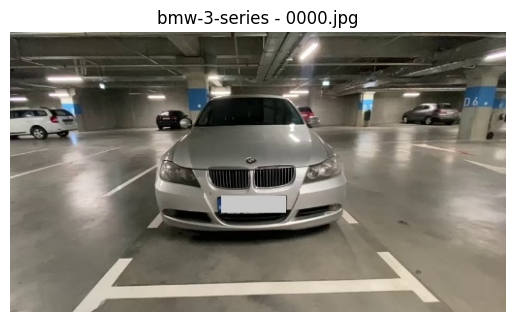

Görsel 2: /content/datasetv2/datasetv2/bmw-3-series/0006.jpg


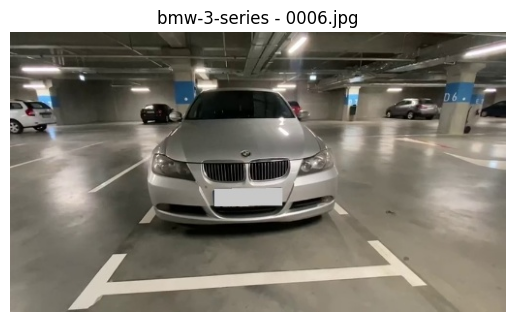

Görsel 3: /content/datasetv2/datasetv2/bmw-3-series/0012.jpg


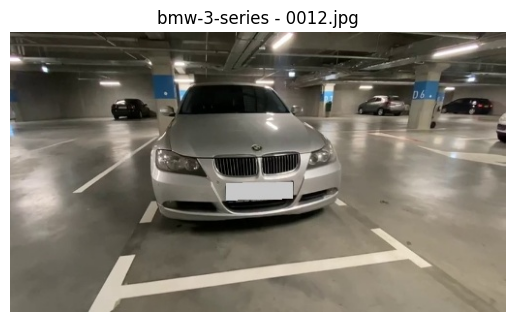

Görsel 4: /content/datasetv2/datasetv2/bmw-3-series/0018.jpg


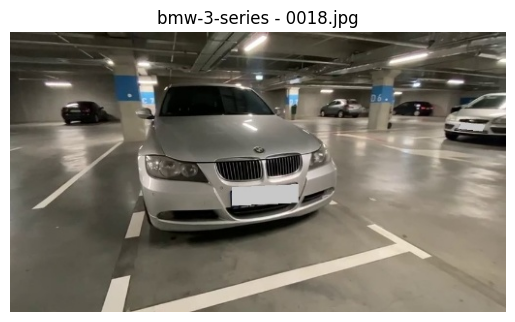

Görsel 5: /content/datasetv2/datasetv2/bmw-3-series/0024.jpg


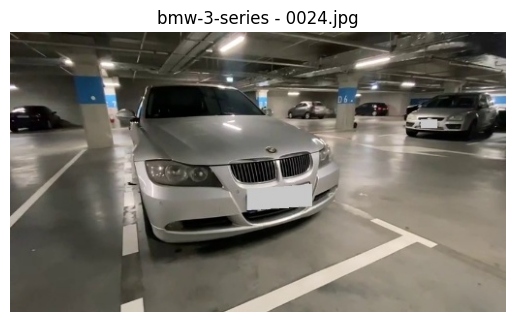

In [28]:
import os
from PIL import Image
import matplotlib.pyplot as plt

image_files = sorted([f for f in os.listdir(class_folder) if f.endswith(".jpg")])[:5]

for i, image_name in enumerate(image_files):
    image_path = os.path.join(class_folder, image_name)
    image = Image.open(image_path)

    print(f"Görsel {i+1}: {image_path}")
    plt.imshow(image)
    plt.axis("off")
    plt.title(f"{target_class} - {image_name}")
    plt.show()


In [29]:
# OpenCLIP örnek kodu (önce model yüklenmiş olmalı)
import torch
from torchvision import transforms
from PIL import Image

# CLIP'e uygun dönüşüm
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.48145466, 0.4578275, 0.40821073),
                         std=(0.26862954, 0.26130258, 0.27577711))
])

features = []

for image_name in image_files:
    image_path = os.path.join(class_folder, image_name)
    image = Image.open(image_path).convert("RGB")
    image_tensor = preprocess(image).unsqueeze(0).to(device)

    with torch.no_grad():
        image_features = model.encode_image(image_tensor)
        image_features /= image_features.norm(dim=-1, keepdim=True)

    features.append(image_features.cpu())

print(f"Toplam {len(features)} adet özellik vektörü çıkarıldı.")


Toplam 5 adet özellik vektörü çıkarıldı.


In [30]:
def predict_class(image_path, class_embeddings):
    test_emb = get_image_embedding(image_path)

    best_score = -1
    best_class = None

    for class_name, class_emb in class_embeddings.items():
        score = torch.cosine_similarity(test_emb, class_emb).item()
        if score > best_score:
            best_score = score
            best_class = class_name

    return best_class, best_score


In [32]:
!pip install git+https://github.com/openai/CLIP.git

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-gwc500et
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-gwc500et
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369490 sha256=0eb1ef31644935e1f1c235ec371f7273a3878ca7c70f8d8454f86ccfd2429d2f
  Stored in directory: /tmp/pip-ephem-wheel-cache-iftorr98/wheels/3f/7c/a4/9b490845988bf7a4db33674d52f709f088f64392063872eb9a
Successfully built clip


In [33]:
import clip

In [44]:
# Otomatik olarak ilk görseli al
class_folder = "/content/datasetv2/datasetv2/audi-a4"
image_files = sorted([f for f in os.listdir(class_folder) if f.endswith(".jpg")])
image_path = os.path.join(class_folder, image_files[0])
print("Kullanılan görsel:", image_path)


Kullanılan görsel: /content/datasetv2/datasetv2/audi-a4/0000.jpg


In [45]:
import os

# Yeni klasör yolu
class_folder = "/content/datasetv2/datasetv2/audi-a4"

# İlk JPG dosyayı al
image_files = sorted([f for f in os.listdir(class_folder) if f.endswith(".jpg")])
image_path = os.path.join(class_folder, image_files[0])
print("Kullanılan görsel:", image_path)


Kullanılan görsel: /content/datasetv2/datasetv2/audi-a4/0000.jpg


In [46]:
# Görseli yükle ve işle
image = preprocess(Image.open(image_path)).unsqueeze(0).to(device)

# Görseli model ile encode et
with torch.no_grad():
    image_features = model.encode_image(image)

# Tüm sınıf adlarını encode et
text_inputs = torch.cat([
    clip.tokenize(f"a high-quality photo of a {c} sedan car") for c in class_names
]).to(device)

# Kozinüs benzerliği ile en benzer metni bul
image_features /= image_features.norm(dim=-1, keepdim=True)
text_features /= text_features.norm(dim=-1, keepdim=True)
similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)

# Tahmin edilen sınıfı göster
predicted_idx = similarity.argmax().item()
predicted_class = class_names[predicted_idx]
print(f"Tahmin edilen sınıf: {predicted_class}")


Tahmin edilen sınıf: audi a4


In [48]:
import os
from PIL import Image

# Klasör yolu
class_folder = "/content/datasetv2/datasetv2/bmw-3-series"

# İlk 10 görseli seç
image_files = sorted([f for f in os.listdir(class_folder) if f.endswith(".jpg")])[:10]
image_paths = [os.path.join(class_folder, f) for f in image_files]
print("Seçilen görseller:")
for p in image_paths:
    print(p)

Seçilen görseller:
/content/datasetv2/datasetv2/bmw-3-series/0000.jpg
/content/datasetv2/datasetv2/bmw-3-series/0006.jpg
/content/datasetv2/datasetv2/bmw-3-series/0012.jpg
/content/datasetv2/datasetv2/bmw-3-series/0018.jpg
/content/datasetv2/datasetv2/bmw-3-series/0024.jpg
/content/datasetv2/datasetv2/bmw-3-series/0030.jpg
/content/datasetv2/datasetv2/bmw-3-series/0036.jpg
/content/datasetv2/datasetv2/bmw-3-series/0042.jpg
/content/datasetv2/datasetv2/bmw-3-series/0048.jpg
/content/datasetv2/datasetv2/bmw-3-series/0054.jpg


In [49]:
import torch

# Görseli preprocess eden fonksiyon zaten vardı, tekrar kullanıyoruz
def get_image_embedding(image_path):
    image = preprocess(Image.open(image_path)).unsqueeze(0).to(device)
    with torch.no_grad():
        image_features = model.encode_image(image)
        image_features /= image_features.norm(dim=-1, keepdim=True)
    return image_features

# Bütün görseller için embedding çıkar
all_embeddings = []
for path in image_paths:
    emb = get_image_embedding(path)
    all_embeddings.append(emb)

# Ortalama embedding
avg_embedding = torch.stack(all_embeddings).mean(dim=0)
avg_embedding /= avg_embedding.norm(dim=-1, keepdim=True)  # normalize et


In [50]:
# Daha önce tanımladığımız sınıflar:
class_names = [
    "bmw 3 series",
    "audi a4",
    "mercedes c class",
    "honda civic",
    "skoda superb"
]
text_tokens = clip.tokenize(class_names).to(device)
with torch.no_grad():
    text_features = model.encode_text(text_tokens)
    text_features /= text_features.norm(dim=-1, keepdim=True)


In [51]:
# Cosine similarity
similarities = (100.0 * avg_embedding @ text_features.T).softmax(dim=-1)
values, indices = similarities[0].topk(1)

print("Tahmin edilen sınıf:", class_names[indices[0]])
print("Benzerlik skorları:")
for i in range(len(class_names)):
    print(f"{class_names[i]}: {similarities[0][i].item():.4f}")


Tahmin edilen sınıf: bmw 3 series
Benzerlik skorları:
bmw 3 series: 0.5955
audi a4: 0.0835
mercedes c class: 0.0058
honda civic: 0.0014
skoda superb: 0.3138


In [52]:
import os
import torch
from PIL import Image
import clip
from torchvision import transforms

# Cihaz ayarı
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

# Hedef görseller klasörü
class_name = "honda-civic"
folder_path = f"/content/datasetv2/datasetv2/{class_name}"

# Tüm görsellerin yolunu al
image_paths = sorted([os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith(".jpg")])

# Görsellerden özellik çıkar
image_features = []
for img_path in image_paths:
    image = preprocess(Image.open(img_path)).unsqueeze(0).to(device)
    with torch.no_grad():
        feature = model.encode_image(image)
        image_features.append(feature)

# Tüm görsellerin ortalama temsili
avg_feature = torch.mean(torch.stack(image_features), dim=0)
avg_feature = avg_feature / avg_feature.norm(dim=-1, keepdim=True)

# Karşılaştırılacak sınıf isimleri
class_names = ["bmw 3 series", "audi a4", "mercedes c class", "honda civic", "skoda superb"]
text_tokens = clip.tokenize(class_names).to(device)

# Metin özellikleri
with torch.no_grad():
    text_features = model.encode_text(text_tokens)
    text_features = text_features / text_features.norm(dim=-1, keepdim=True)

# Benzerlik hesapla
similarities = (avg_feature @ text_features.T).squeeze(0)
best_idx = similarities.argmax().item()
predicted_class = class_names[best_idx]

# Sonucu yazdır
print(f"Tahmin edilen sınıf: {predicted_class}")
print("Benzerlik skorları:")
for name, score in zip(class_names, similarities):
    print(f"{name}: {score:.4f}")


Tahmin edilen sınıf: honda civic
Benzerlik skorları:
bmw 3 series: 0.2195
audi a4: 0.2330
mercedes c class: 0.2419
honda civic: 0.3262
skoda superb: 0.2357
